Starting by setting up the environment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import keras
from keras import layers # Layers api for sequential model

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/heart-disease-uci"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['heart.csv']


We start by reading the data from the CSV File.
We then split the data into inputs and targets.

In [2]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")
np_arr = df.values
X = np_arr[:, 0:13]
Y = np_arr[:, 13]
print(X.shape, Y.shape)

(303, 13) (303,)


We are using StandardScaler from sklearn library to process the input data.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
s_X = scaler.transform(X)

We make the Sequential model using Keras.layers
The Network is dense connected and of shape [13, 10, 5, 1]

We use Adam optimizer, mean_squared_loss and accuracy as evaluation metric.

In [4]:
model = keras.Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (13,)))
model.add(layers.Dense(5, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['accuracy'])

We fit the dataset into the model.

Using 500 epochs and batches of size 10

In [5]:
history = model.fit(s_X, Y, epochs = 500, batch_size = 10, verbose=0)

Finally the model has been trained. Now we can visualize the training and view accuracy and confusion matrix.

In [6]:
y_pred = model.predict(s_X)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(Y, y_pred.round())
acc = accuracy_score(Y, y_pred.round())
print("Accuracy of the model : ",acc)
print("The Confusion matrix :\n", cm)

Accuracy of the model :  0.966996699669967
The Confusion matrix :
 [[134   4]
 [  6 159]]


Now Finally we can take a look at the loss value throughout the training.

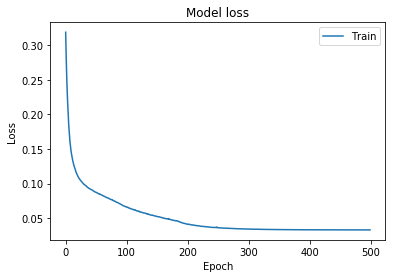

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

We now have a model that can predict the Heart Diseases with about 97% accuracy.